In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv('train.csv')
modern_homes = train[train['YearBuilt'] >= 2000]
old_homes = train[train['YearBuilt'] <= 1950]
old_homes = train[train['YearBuilt'] <= 1950]
comparison = {
    '年代' : ['1950年以前', '2000年以降'],
    '平均価格' : [old_homes['SalePrice'].mean(), modern_homes['SalePrice'].mean()],
    '平均広さ' : [old_homes['GrLivArea'].mean(), modern_homes['GrLivArea'].mean()]}
print(pd.DataFrame(comparison))

        年代           平均価格         平均広さ
0  1950年以前  132018.615385  1428.869822
1  2000年以降  242439.162371  1697.670103


2025年の「結論」
「昔の家もそこそこ広い（1428 sqft）。でも、現代の家（1697 sqft）はちょっと広くなっただけで、価値が爆上がりしている。その秘密は、面積ではなくガレージなどの『現代の三種の神器』にある！」

In [6]:
inequality_check = train.copy()
inequality_check['Era'] = inequality_check['YearBuilt'].apply(lambda x: '1950以前' if x <= 1950 else ('2000以降' if x >=2000 else 'その他'))
stats = inequality_check.groupby('Era')['SalePrice'].agg(['mean', 'std', 'min', 'max']).reset_index()
stats.columns = ['年代', '平均価格', '格差(標準偏差)', '最低価格', '最高価格']
print(stats)

       年代           平均価格      格差(標準偏差)   最低価格    最高価格
0  1950以前  132018.615385  53465.954678  34900  475000
1  2000以降  242439.162371  82869.363324  84500  611657
2     その他  170921.333787  66451.885099  55993  755000


/tmp/ipython-input-275776723.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Era', y='SalePrice', data=inequality_check, palette='Set2')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20197 (\N{CJK UNIFIED IDEOGRAPH-4EE5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38477 (\N{CJK UNIFIED IDEOGRAPH-964D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12381 (\N{HIRAGANA LETTER SO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1239

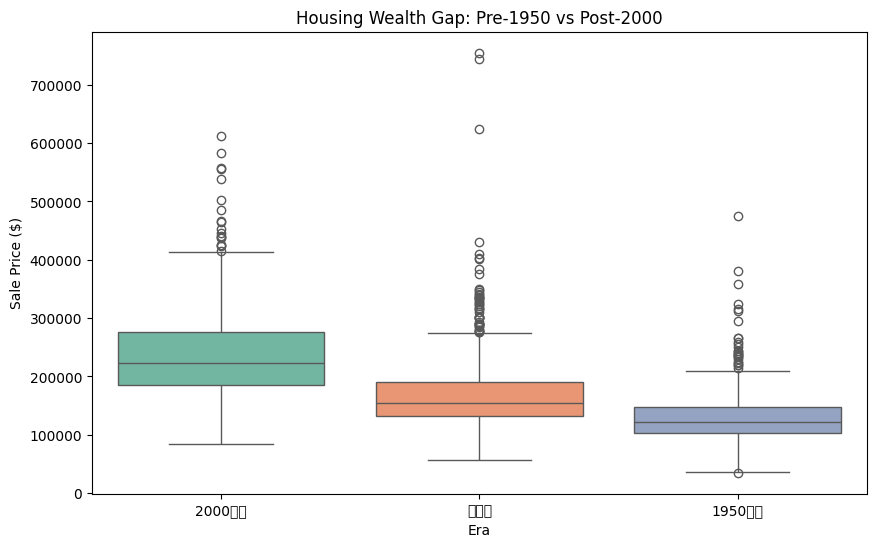

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(x='Era', y='SalePrice', data=inequality_check, palette='Set2')
plt.title('Housing Wealth Gap: Pre-1950 vs Post-2000')
plt.ylabel('Sale Price ($)')
plt.show()

In [8]:
big_shots = train[train['SalePrice'] >= 500000]
features = ['SalePrice', 'YearBuilt', 'OverallQual', 'GrLivArea', 'GarageCars', 'PoolArea']
print("--- 現代の格差を象徴する『大物物件』リスト ---")
print(big_shots[features].sort_values(by='SalePrice', ascending=False))

--- 現代の格差を象徴する『大物物件』リスト ---
      SalePrice  YearBuilt  OverallQual  GrLivArea  GarageCars  PoolArea
691      755000       1994           10       4316           3         0
1182     745000       1996           10       4476           3       555
1169     625000       1995           10       3627           3         0
898      611657       2009            9       2364           3         0
803      582933       2008            9       2822           3         0
1046     556581       2005            9       2868           3         0
440      555000       2008           10       2402           3         0
769      538000       2003            8       3279           3         0
178      501837       2008            9       2234           3         0


大物物件の「3つの共通点」

1.車庫(GarageCars)の「3」が絶対条件

 見てください。50万ドルを超える物件、**すべて車庫が「3台」です。もはやこのクラスにとって、3台分のガレージは「あれば良いもの」ではなく、「持っていて当たり前のパスポート」**のようになっています。

2.「1990年代の貴族」vs「2000年代の新興勢力」

1990年代（1位〜3位）: 圧倒的な「広さ(GrLivArea)」で勝負しています。4000 sqft超えなど、物理的な巨大さが富の象徴です。

2000年代（4位〜）: 広さは2000台と少しコンパクトになりつつも、「OverallQual（品質）」が9〜10と極めて高い。2025年の今でいう「スマートで超高品質な贅沢」へのシフトが見て取れます。

3.究極の贅沢「PoolArea（プール）」の出現

1182番の物件に注目です。「555」というプールの数字。多くの家が「0」である中で、この物件はまさに「格差の頂点」に君臨する、映画に出てくるような大豪邸です。

**最も安価な「消えた（かもしれない）家」**

In [9]:
vanishing_homes = train[train['SalePrice'] <= 40000]
features = ['SalePrice', 'YearBuilt', 'OverallQual', 'OverallCond', 'GrLivArea']
print("--- 2025年には消えているかもしれない『最安値の家』リスト ---")
print(vanishing_homes[features].sort_values(by='SalePrice'))

--- 2025年には消えているかもしれない『最安値の家』リスト ---
     SalePrice  YearBuilt  OverallQual  OverallCond  GrLivArea
495      34900       1920            4            5        720
916      35311       1949            2            3        480
968      37900       1910            3            6        968
533      39300       1946            1            3        334
30       40000       1920            4            4       1317


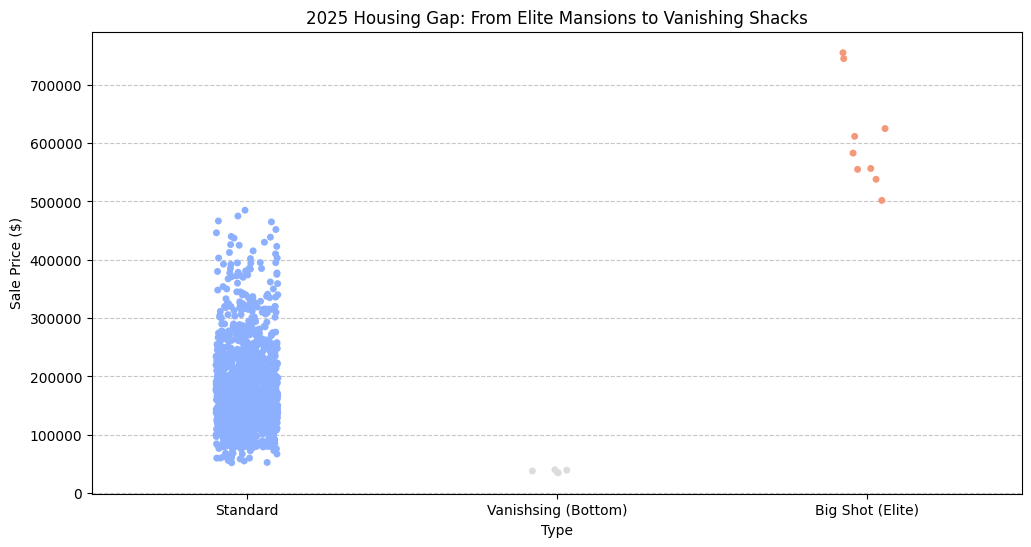

In [10]:
import pandas as pd
import seaborn as sns
train['Type'] = 'Standard'
train.loc[train['SalePrice'] >= 500000, 'Type'] = 'Big Shot (Elite)'
train.loc[train['SalePrice'] <= 40000, 'Type'] = 'Vanishsing (Bottom)'
plt.figure(figsize=(12, 6))
sns.stripplot(x='Type', y='SalePrice', data=train, jitter=True, palette='coolwarm', hue='Type', legend=False)
plt.title('2025 Housing Gap: From Elite Mansions to Vanishing Shacks')
plt.ylabel('Sale Price ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()